## Practicing data redemption for one Wikipedia page ##

In [43]:
import requests as rq
import json
import os
import wikipedia
from urllib.request import urlopen
import pandas as pd
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
url = "https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Hamilton&prop=revisions&rvprop=content"
data = rq.get(url).json()
bfile = open('Hamilton.txt', 'w+')
json.dump(data, bfile)
bfile.close()

## Referencing List of Broadway Shows Since 2010, CORGI ##

In [10]:
Broadway_Original = pd.read_csv('/Users/morganhogenmiller/Desktop/DA 401/Data sets/broadway(corgi).csv') #Read in CORGI data set

In [11]:
Google_Parameters= Broadway_Original[['Name','Year','Month','Day','Type']] #Reduce data set to variables to input into GT

#Filter to shows after 2010 only
Google_Parameters=Google_Parameters.loc[Google_Parameters['Year']>2010] 
Google_Parameters=Google_Parameters.loc[Google_Parameters['Type']=='Musical']

In [49]:
#Provides a list of shows in form needed for function 
show_list=list(Google_Parameters.Name.unique()) 
show_list.sort() #in alphabetical order

## Counting number of articles within Wikipedia category for Broadway musicals##

In [ ]:
#To clean, make something that says if it begins with Category, take it out
def categories(category):
    """This function takes a Wikipedia category as an input and outputs the number of Wikipedia
    articles that exist in that category."""
    count = "0"
    articles = list()

    # Loop through each musical and update count each time
    while True:
        url = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:"+category+"&cmlimit=500&prop=revisions&rvprop=content&cmcontinue="+ count
        data = rq.get(url).json()
        articles.extend(data['query']['categorymembers'])
        try:
            count = data['continue']['cmcontinue']
        except:
            break

    # Get the heroes and villains and ambiguous's names from the data
    articles = [x['title'] for x in articles]

    return("Number of articles in the "+ category + " category: "+ str(len(articles)), articles)

In [ ]:
results=categories('Broadway_musicals')
articles=results[1] # creating an object for the list of musical titles
#categories('Tony_Award_Winning_musicals')

## Download text data for each show and put it in a folder on Desktop ##

In [ ]:
#Filter to shows after 2010 only
Google_Parameters=Google_Parameters.loc[Google_Parameters['Year']>2010] 

In [ ]:
for a in articles:
    #if a not in ambiguous:
    data = rq.get("https://en.wikipedia.org/wiki/" + str(a)).text
    a = a.replace("/", "~")
    a = a.replace("\\", "~")
    pathname = "/Users/morganhogenmiller/Desktop/DA 401" + "/Musical Articles/" + a
    f = open(pathname, "w+") 
    f.write(data)
    f.close()

## Using Wikipedia Package to find Summaries##
### wikipedia page= lifesaver ###

In [ ]:
#article_texts=[]
#each_text=[]
#for a in articles[1:10]:
    #html = urlopen("https://en.wikipedia.org/wiki/" + a)
    #soup = BeautifulSoup(html, 'html.parser')
    #for i in soup.find_all('p'):
        #article_texts.append(i.text)
#article_texts[1]

### Before doing the step below, I had to change the names of shows in the original broadway data set to get the correct Wikipedia summeries ###

The shows I manusally changed were:
Beautiful-> Beautiful: The Carol King Musical
Cabaret'14 -> Cabaret (musical)
Fela! '14 -> Fela! (musical)
Hamilton -> Hamilton (musical)
The People In the Picture->The People in the Picture


In [31]:
#Making a list of the summaries of all 113 shows
reviews=[]
show_list2=[]
for a in show_list:
    if '(musical)' in a: #if already states in name that it is musical, add
        show_list2.append(a)
        w=wikipedia.page(a)
        reviews.append(w.summary)
    elif 'Musical' in a: # "  " ^
        show_list2.append(a)
        w=wikipedia.page(a)
        reviews.append(w.summary)
    elif '(musical)' not in a: #special case show...name in data set not akin to what Wikipedia needs for search
        if a == 'Paramour':
            show_list2.append(a)
            w=wikipedia.page(a +'(Cirque du Soleil)')
            reviews.append(w.summary)
        if a in ['Fela!','Godspell', 'The People in the Picture']: 
            show_list2.append(a)#Shows Wikipedia doesn't identitfy with 'musical' in the name
            w=wikipedia.page(a)
            reviews.append(w.summary)
        if a not in ['Fela!','Godspell','Paramour','The People in the Picture']:  
            show_list2.append(a)
            w=wikipedia.page(a +'(musical)') #make sure shows with book, movie, etc. names pull only Wikipedia's musical article
            reviews.append(w.summary)
        

In [32]:
len(reviews)   
list(set(show_list) - set(show_list2))

[]

### Tomorrow work with Wikipedia and text blob and then fix code & do preliminary analysis and write ###
### Think about making more complicated classifier, too ##

In [60]:
summary_sent=[]
for r in reviews:
    blob = TextBlob(r) #grabs the text in each headline
    sent=blob.sentiment.polarity #polarity between (0-1) of the
    summary_sent.append(sent)
summary_sent

summary_sentimentality=pd.DataFrame({'Name':show_list ,'Sentimentality':summary_sent}) #Makes dataframe of 

summary_sentimentality.sort_values(by=['Sentimentality'])

,Name,Sentimentality
17,Bloody Bloody Andrew Jackson,-0.320000
4,After Midnight,-0.104167
20,Bring It On The Musical,-0.071441
45,Hands On A Hardbody,-0.066667
37,First Date,-0.062500
15,Big Fish,-0.042857
5,Aladdin,-0.022203
6,Allegiance,-0.020833
10,An American In Paris,-0.012500
47,Holler If Ya Hear Me,0.000000


### Analysis ###

In [ ]:
#Exporting sentimentalities as a csv file
pd.DataFrame.to_csv(summary_sentimentality,'summary_sentimentality.csv')

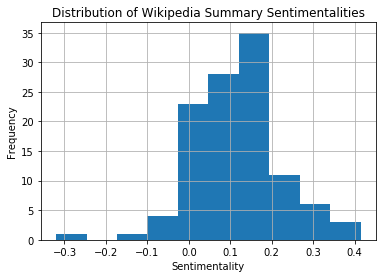

In [47]:
#Distribution of Wikipedia Sentimentalities
plot=summary_sentimentality['Sentimentality'].hist()
plot.set_xlabel("Sentimentality")
plot.set_ylabel("Frequency")
plot.set_title("Distribution of Wikipedia Summary Sentimentalities")

plt.show()

In [65]:
summary_sentimentality.head(10) #lowest sentimentalities
summary_sentimentality.tail(10) #top sentimentalities

#Number of weeks each show was on Broadway
Name_Counts=pd.DataFrame(Google_Parameters['Name'].value_counts())
#namecount=list(Name_Counts)
#print(len(Name_Counts))
Name_Counts
#summary_sentimentality

#df_concat = pd.concat([Name_Counts, summary_sentimentality], axis=1)

AttributeError: 'DataFrame' object has no attribute 'sort'